## Assignment: Random Forest

**Requirements:**

- Download the following datasets and perform the necessary preprocessing depending on the task assigned to the dataset.
- Bank Marketing Dataset (Classification, target = "bank term deposit")
- U.S. Pollution Dataset (Regression, target = "CO AQI")
- Perform EDA on both datasets
- Create a Random Forest model for each dataset
- Report appropriate evaluation metrics for each model
- Compare the results of your models on the test data to the results on your train data and baseline models

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# This is for regression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor

# This is for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import tree

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

### EDA And Random Forest Model for Bank Marketing Dataset:

In [6]:
#Read file with Semicolon delimiter
bank = pd.read_csv('./data/bank.csv', sep=';')

In [7]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [8]:
bank.shape

(4521, 17)

In [9]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [10]:
bank.describe(exclude = 'number')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000


In [11]:
# No null values
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [12]:
bank.education.unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [13]:
# poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
bank.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

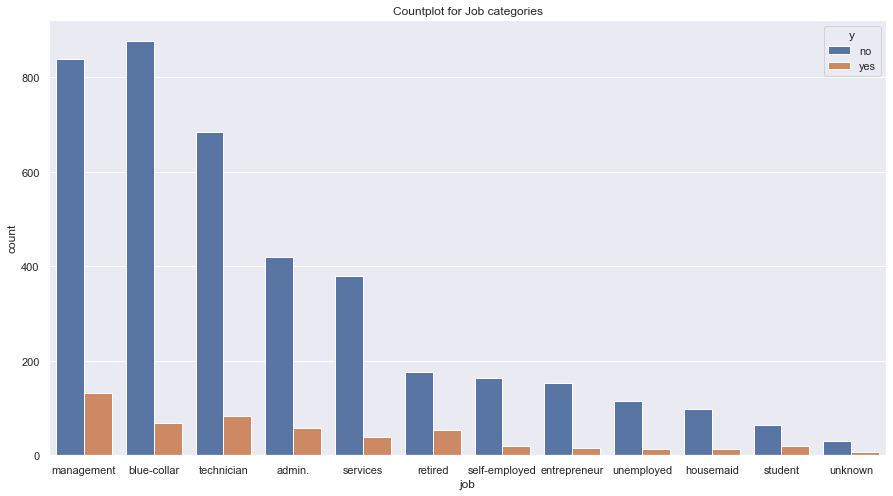

In [30]:
# Countplot for categorical columns
sns.set_theme()
plt.subplots(figsize=(15, 8))
plt.title('Countplot for Job categories by client subscription')
sns.countplot(x='job', data=bank, hue= 'y', order = bank['job'].value_counts().index);

From the count plot we can see the job categories for the clients and whether they have subscribe a term deposit or not, we notice that and the highest number of management employee do have a term deposit, however when we compare the yes to no we find the majority do not have a subscription.

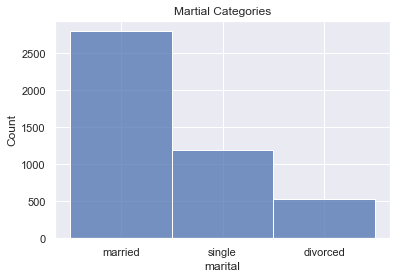

In [47]:
sns.set_theme()
plt.title('Martial Categories')
sns.histplot(data=bank, x="marital");

The bank mostly has a married Clients and few divorced.

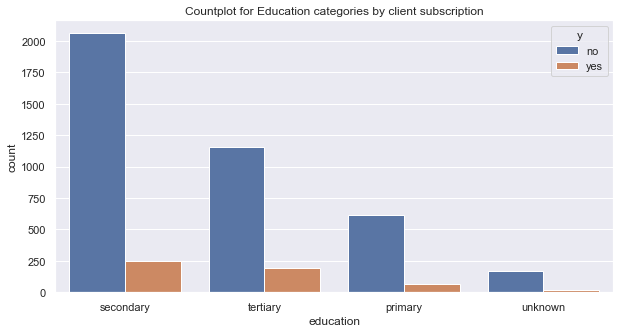

In [49]:
sns.set_theme()
plt.subplots(figsize=(10, 5))
plt.title('Countplot for Education categories by client subscription')
sns.countplot(x='education', data=bank, hue= 'y', order = bank['education'].value_counts().index);

Most clients have a Secondary degree and they are the highest subscribed clients then the tertiary. we see also the difference between the yes and no in subscription to term deposit

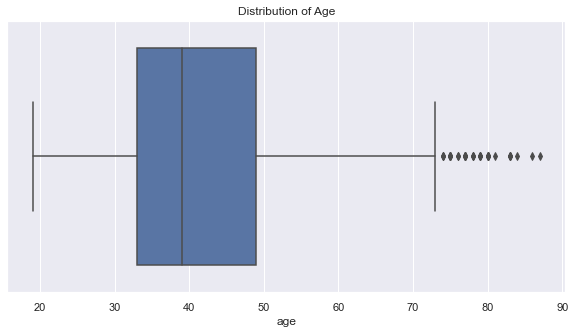

In [51]:
sns.set_theme()
plt.subplots(figsize=(10, 5))
plt.title('Distribution of Age')
sns.boxplot(x='age' , data= bank);

The bank clients age is between 20 and 72. lower quartile of the age is above 30 and upper is less than 50, and the median is 38. we have some outliers above 72.

In [52]:
# Baseline 
bank["y"].value_counts(normalize=True)

no     0.88476
yes    0.11524
Name: y, dtype: float64

In [53]:
# Save X data
X1 = bank.drop(columns = 'y')

y1 = bank['y']

# Train test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1,test_size=0.2, random_state=20)

In [56]:
yes_no ={'yes':1, 'no':0}
y_test1 = y_test1.replace(yes_no)
y_train1 =y_train1.replace(yes_no)

In [57]:
X_train1=X_train1.replace({"housing":yes_no,"default":yes_no,"loan":yes_no})
X_test1=X_test1.replace({"housing":yes_no,"default":yes_no,"loan":yes_no})

In [58]:
X_train1 = pd.get_dummies(X_train1, columns=["job","marital","education","contact","poutcome"])
X_train1 = pd.get_dummies(X_train1)

In [59]:
X_test1 = pd.get_dummies(X_test1, columns=["job","marital","education","contact","poutcome"])
X_test1 = pd.get_dummies(X_test1)

In [73]:
class_forest = RandomForestClassifier(n_estimators = 10, criterion = 'gini', random_state = 20, max_depth=15)

In [74]:
class_forest.fit(X_train1, y_train1)

y_preds = class_forest.predict(X_test1)

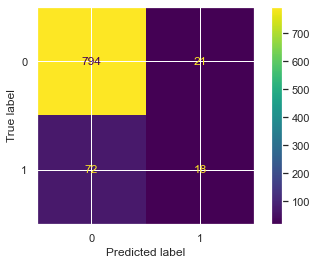

In [75]:
#Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test1, y_preds);

In [77]:
val_train = round(class_forest.score(X_train1, y_train1)*100,2)
val_test = round(class_forest.score(X_test1, y_test1)*100,2)

print(f'Training Accuracy: {val_train}%')
print(f'Test Set Accuracy: {val_test}%')

Training Accuracy: 97.21%
Test Set Accuracy: 89.72%


In [82]:
print("Random Forest classification Model: ")
print("Accuracy:",round(metrics.accuracy_score(y_test1, preds_class)*100,2),'%')
print("Recall:",round(metrics.recall_score(y_test1, preds_class)*100,2),'%')
print("Precision:",round(metrics.precision_score(y_test1, preds_class)*100,2),'%')
print('\n')

print("Baseline Model: ")
print(bank["y"].value_counts(normalize=True))
print('\n')

Random Forest classification Model: 
Accuracy: 89.72 %
Recall: 20.0 %
Precision: 46.15 %


Baseline Model: 
no     0.88476
yes    0.11524
Name: y, dtype: float64




### EDA And Random Forest Regression for Pollution Dataset:

In [118]:
pollution = pd.read_csv('./data/pollution_us_2000_2016.csv')
pollution.head()

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


The data set has four major pollutants (Nitrogen Dioxide, Sulphur Dioxide, Carbon Monoxide and Ozone) for every day from 2000 - 2016 

In [119]:
pollution.shape

(1746661, 29)

In [120]:
pollution.describe()

,Unnamed: 0,State Code,County Code,Site Num,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
count,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,873754.000000,1.746661e+06,1.746661e+06,1.746661e+06,873338.000000
mean,5.471414e+04,2.230907e+01,7.169381e+01,1.118214e+03,1.282193e+01,2.541485e+01,1.173102e+01,2.389822e+01,2.612485e-02,3.920331e-02,1.017053e+01,3.605012e+01,1.870364e+00,4.492185e+00,9.664906e+00,7.115945,3.682177e-01,6.201067e-01,7.875026e+00,5.996595
std,3.372908e+04,1.725621e+01,7.948023e+01,2.003103e+03,9.504814e+00,1.599963e+01,7.877501e+00,1.516280e+01,1.136974e-02,1.534362e-02,4.003144e+00,1.978042e+01,2.760435e+00,7.679866e+00,6.731228e+00,11.937473,3.140231e-01,6.439361e-01,7.978844e+00,5.851836
min,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000,-4.375000e-01,-4.000000e-01,0.000000e+00,0.000000
25%,2.575300e+04,6.000000e+00,1.700000e+01,9.000000e+00,5.750000e+00,1.300000e+01,5.000000e+00,1.200000e+01,1.787500e-02,2.900000e-02,9.000000e+00,2.500000e+01,2.565220e-01,8.000000e-01,5.000000e+00,1.000000,1.834580e-01,2.920000e-01,0.000000e+00,2.000000
50%,5.304500e+04,1.700000e+01,5.900000e+01,6.000000e+01,1.073913e+01,2.400000e+01,9.000000e+00,2.300000e+01,2.587500e-02,3.800000e-02,1.000000e+01,3.300000e+01,9.875000e-01,2.000000e+00,8.000000e+00,3.000000,2.926250e-01,4.000000e-01,6.000000e+00,5.000000
75%,8.033600e+04,4.000000e+01,9.700000e+01,1.039000e+03,1.771364e+01,3.570000e+01,2.000000e+01,3.300000e+01,3.391700e-02,4.800000e-02,1.100000e+01,4.200000e+01,2.325000e+00,5.000000e+00,1.400000e+01,9.000000,4.666670e-01,8.000000e-01,1.300000e+01,8.000000
max,1.345750e+05,8.000000e+01,6.500000e+02,9.997000e+03,1.395417e+02,2.670000e+02,2.300000e+01,1.320000e+02,9.508300e-02,1.410000e-01,2.300000e+01,2.180000e+02,3.216250e+02,3.510000e+02,2.300000e+01,200.000000,7.508333e+00,1.990000e+01,2.300000e+01,201.000000


In [121]:
pollution.describe(exclude= 'number')

,Address,State,County,City,Date Local,NO2 Units,O3 Units,SO2 Units,CO Units
count,1746661,1746661,1746661,1746661,1746661,1746661,1746661,1746661,1746661
unique,204,47,133,144,5996,1,1,1,1
top,PIKE AVE AT RIVER ROAD,California,Los Angeles,Not in a city,2002-06-10,Parts per billion,Parts per million,Parts per billion,Parts per million
freq,35332,576142,93381,138411,640,1746661,1746661,1746661,1746661


In [122]:
poll = pollution.drop(['Unnamed: 0','State', 'County', 'City','Date Local','State Code','County Code','Site Num','Address','NO2 Units','O3 Units','SO2 Units','CO Units'],axis=1)
poll.head()

,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,1.145833,4.2,21,NaN
1,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,0.878947,2.2,23,25.0
2,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,1.145833,4.2,21,NaN
3,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,0.878947,2.2,23,25.0
4,22.958333,36.0,19,34,0.013375,0.032,10,27,1.958333,3.0,22,4.0,0.850000,1.6,23,NaN


In [123]:
poll.isnull().sum() 

NO2 Mean                  0
NO2 1st Max Value         0
NO2 1st Max Hour          0
NO2 AQI                   0
O3 Mean                   0
O3 1st Max Value          0
O3 1st Max Hour           0
O3 AQI                    0
SO2 Mean                  0
SO2 1st Max Value         0
SO2 1st Max Hour          0
SO2 AQI              872907
CO Mean                   0
CO 1st Max Value          0
CO 1st Max Hour           0
CO AQI               873323
dtype: int64

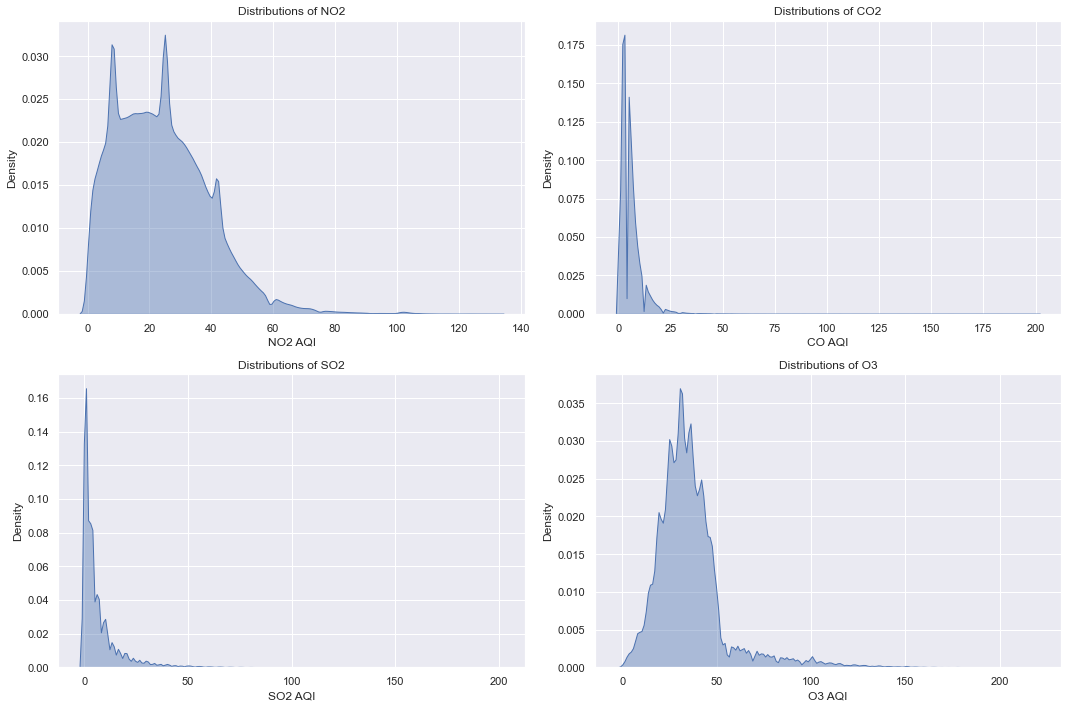

In [125]:
# Setting height and width of subplots
plt.figure(figsize=(15,8))

plt.subplot(2, 2, 1) 
sns.kdeplot(x=poll['NO2 AQI'],label='NO2 AQI',shade=True,alpha=.4)
plt.title('Distributions of NO2')
plt.subplot(2, 2, 2) 
sns.kdeplot(x=poll['CO AQI'],label='CO AQI',shade=True,alpha=.4)
plt.title('Distributions of CO2')
plt.subplot(2,2,3)
sns.kdeplot(x=poll['SO2 AQI'],label='SO2 AQI',shade=True,alpha=.4)
plt.title('Distributions of SO2')
plt.subplot(2,2,4)
sns.kdeplot(x=poll['O3 AQI'],label='O3 AQI',shade=True,alpha=.4)
plt.title('Distributions of O3')
plt.tight_layout()
plt.show()

we see the distribution of air quality index of Nitrogen Dioxide(NO2) between 0 and 60 as the high density almost in 10 and 30.

while in Carbon Monoxide(CO) between 0 and 25,in Sulphur Dioxide(SO2) between 0 and 50, lastly in and Ozone(O3) between 0 and 100 with highest density at 40.

In [126]:
# Split the dataset 

train2, test2 = train_test_split(
    poll,
    test_size=0.2,
    train_size = 0.8,
    random_state=900
)

In [127]:
# filling the NA's
train2=train2.fillna(method='ffill')
train2=train2.fillna(method='bfill')
test2=test2.fillna(method='ffill')
test2=test2.fillna(method='bfill')

In [128]:
X_train2 = train2.drop(columns = 'CO AQI')
y_train2 = train2['CO AQI']

X_test2 = test2.drop(columns = 'CO AQI')
y_test2 = test2['CO AQI']

print(X_train2.shape)
print(X_test2.shape)

(1397328, 15)
(349333, 15)


In [135]:
# Create a logistic regression model to compare with the decision tree model

reg_log = LinearRegression()
reg_log.fit(X_train2, y_train2)

preds_log = reg_log.predict(X_test2)
reg_mae = mean_absolute_error(y_true=y_test2, y_pred=preds_log)
reg_mae

3.1150604415073864

In [130]:
reg_forest = RandomForestRegressor(n_estimators = 10, random_state = 0, criterion='squared_error')
reg_forest.fit(X_train2, y_train2)

preds_forest = reg_log.predict(X_test2)
mean_absolute_error(y_true=y_test2, y_pred=preds_forest)

3.1150604415073864

In [131]:
mse = mean_squared_error(y_true=y_test2, y_pred=preds_forest)
mae = mean_absolute_error(y_true=y_test2, y_pred=preds_forest)

In [136]:
print("Linear Regression Model:")
print("MAE:", reg_mae)
print('\n')
print("Random Forest Regression Model:")
print("MSE:",mse)
print("MAE:",mae)

Linear Regression Model:
MAE: 3.1150604415073864


Random Forest Regression Model:
MSE: 26.209986561492162
MAE: 3.1150604415073864


Both models give us an equal mean squared error